# Economic Data Revisions

_UNDER CONSTRUCTION_


- St Louis Fed FRED: popular series, api
- ALFRED: archival, releases, vintages, revisions
- FRED-MD: release dates

https://journals.ala.org/index.php/dttp/article/view/6383/8404


In [1]:
import time
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from finds.readers import Alfred, fred_md, fred_qd
from finds.misc import Show
from finds.plots import plot_date
from datetime import datetime
from secret import credentials, paths
show = Show(ndigits=4, latex=None)
VERBOSE = 0
# %matplotlib qt
imgdir = paths['images'] / 'ts'
today = int(datetime.today().strftime('%Y%m%d'))

In [3]:
alf = Alfred(api_key=credentials['fred']['api_key'],
             savefile=imgdir / 'revisions.pkl',
             verbose=VERBOSE)

## Popular FRED series


In [4]:
popular = {}
titles = Alfred.popular(1)
for title in titles:
    series = alf.request_series(title)   # requests 'series' FRED api    
    if not series.empty:
        popular[title] = series.iloc[-1][['title', 'popularity']]
show(DataFrame.from_dict(popular, orient='index'),
     caption=f"Popular Series in FRED, retrieved {today}")

,title,popularity
"Popular Series in FRED, retrieved 20230831",,
T10Y2Y,10-Year Treasury Constant Maturity Minus 2-Yea...,100
MORTGAGE30US,30-Year Fixed Rate Mortgage Average in the Uni...,100
FEDFUNDS,Federal Funds Effective Rate,98
CPIAUCSL,Consumer Price Index for All Urban Consumers: ...,95
M2SL,M2,93
WALCL,Assets: Total Assets: Total Assets (Less Elimi...,95
T10Y3M,10-Year Treasury Constant Maturity Minus 3-Mon...,95
BAMLH0A0HYM2,ICE BofA US High Yield Index Option-Adjusted S...,94
UNRATE,Unemployment Rate,93


/home/terence/Dropbox/github/data-science-notebooks/finds/plots.py:159: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  plt.locator_params(axis='x', nbins=nbins)  # numeric ticks
/tmp/ipykernel_4096016/2958181288.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


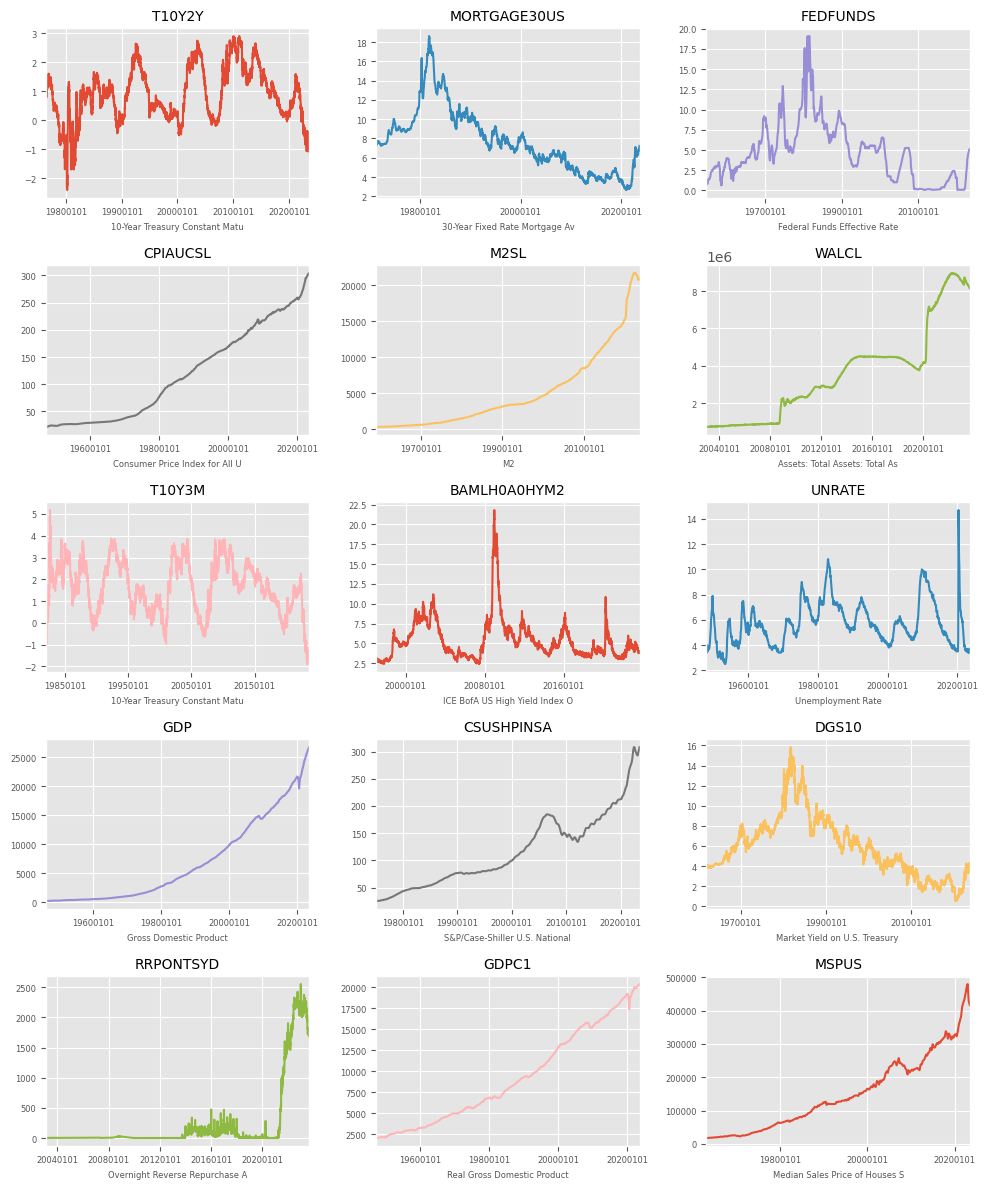

In [5]:
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(10, 12), layout='constrained')
for cn, (ax, title) in enumerate(zip(np.ravel(axes), titles[:15])):
    series = alf(title)
    plot_date(series, ax=ax, title=title, xlabel=alf.header(title)[:30],
              fontsize=6, ls='-', cn=cn, nbins=4)
plt.tight_layout()

In [6]:
# Traversing categories tree
node = 0
while True:
    node = alf.get_category(node)
    print(f"[{node['id']}]", node['name'],
          f"(#children = {len(node['children'])})",
          f"(#series = {len(node['series'])})")
    if not (node['children']):
        break
    node = np.min([child['id'] for child in node['children']])
for i, row in enumerate(node['series']):
    print(i, row['id'], row['title'])

https://api.stlouisfed.org/fred/category?category_id=0&api_key=eb428f329807459fa7bee89be4ebbc3b&file_type=json
https://api.stlouisfed.org/fred/category/children?category_id=0&api_key=eb428f329807459fa7bee89be4ebbc3b&file_type=json
https://api.stlouisfed.org/fred/category/series?category_id=0&api_key=eb428f329807459fa7bee89be4ebbc3b&file_type=json&offset=0
[0] Categories (#children = 8) (#series = 0)
https://api.stlouisfed.org/fred/category?category_id=1&api_key=eb428f329807459fa7bee89be4ebbc3b&file_type=json
https://api.stlouisfed.org/fred/category/children?category_id=1&api_key=eb428f329807459fa7bee89be4ebbc3b&file_type=json
https://api.stlouisfed.org/fred/category/series?category_id=1&api_key=eb428f329807459fa7bee89be4ebbc3b&file_type=json&offset=0
https://api.stlouisfed.org/fred/category/series?category_id=1&api_key=eb428f329807459fa7bee89be4ebbc3b&file_type=json&offset=1000
https://api.stlouisfed.org/fred/category/series?category_id=1&api_key=eb428f329807459fa7bee89be4ebbc3b&file_t


https://alfred.stlouisfed.org/graph/?graph_id=354151


In [7]:
# INDPRO by latest, vintage, revision number, time lag
series_id, freq = 'INDPRO', 'M'  # https://www.bea.gov/gdp-revision-information
#series_id = 'CPIAUCSL'
series_id, freq = 'GDPC1', 'Q'

In [8]:
print(f"Latest revision retrieved {today}:")
print(alf(series_id,
          start=20200401,
          end=20200731,
          freq=freq,
          realtime=True))

Latest revision retrieved 20230831:
              GDPC1  realtime_start  realtime_end
date                                             
20200630  17378.712        20220929      99991231


In [9]:
print("First Release:")
print(alf(series_id,
          release=1,
          start=20200401,
          end=20200731,
          freq=freq,
          realtime=True))

First Release:
              GDPC1  realtime_start  realtime_end
date                                             
20200630  17205.822        20200730      20200826


In [10]:
print("Second Release:")
print(alf(series_id,
          release=2,
          start=20200401,
          end=20200731,
          freq=freq,
          realtime=True))

Second Release:
              GDPC1  realtime_start  realtime_end
date                                             
20200630  17282.188        20200827      20200929


In [11]:
print("Revised Up to 5-months Later:")
print(alf(series_id,
          release=pd.DateOffset(months=5),
          start=20200401,
          end=20200731,
          freq=freq,
          realtime=True))

Revised Up to 5-months Later:
              GDPC1  realtime_start  realtime_end
date                                             
20200630  17302.511        20200930      20210728


In [12]:
print("Latest as of Vintage date 2020-06-30:")
print(alf(series_id,
          vintage=20200630,
          realtime=True,
          freq=freq,
          start=20200401))

Latest as of Vintage date 2020-06-30:
Empty DataFrame
Columns: [GDPC1, realtime_start, realtime_end]
Index: []


            Revised up to 1-months later  Revised up to 3-months later   
date                                                                     
2017-09-30                     17156.946                     17163.894  \
2017-12-31                     17272.468                     17286.497   
2018-03-31                     17385.831                     17371.854   
2018-06-30                     18507.200                     18511.576   
2018-09-30                     18671.497                     18664.973   
2019-03-31                     18912.326                     18910.332   
2019-06-30                     19023.820                     19021.860   
2019-09-30                     19112.542                     19121.112   
2019-12-31                     19219.767                     19221.970   
2020-03-31                     18987.877                     18977.363   
2020-06-30                     17205.822                     17302.511   
2020-09-30                     18583.9

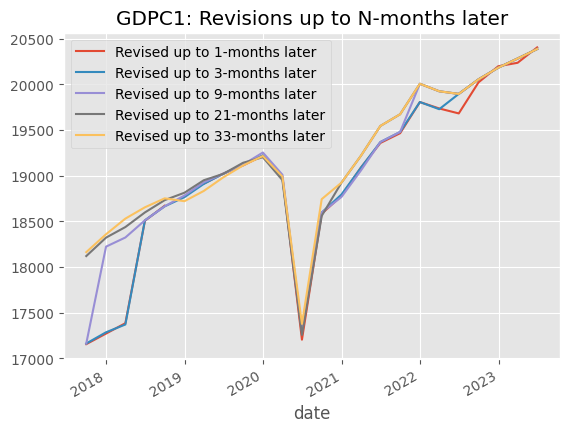

In [13]:
# revisions history up to N-months later
df = pd.concat([alf(series_id,
                    start=today - 60000,
                    freq=freq,
                    release=pd.DateOffset(months=m))\
                .rename(f"Revised up to {m}-months later")
                for m in [1, 3, 9, 21, 33]], axis=1)
df.index = pd.DatetimeIndex(df.index.astype(str))
ax = df.plot(logy=False)
ax.set_title(f"{series_id}: Revisions up to N-months later")
if imgdir:
    plt.savefig(imgdir / 'release_months.jpg')
print(df)

,release 1,release 2,release 3,release 4,release 5,release 6,release 7,release 8
"GDPC1 Revisions, retrieved 20230831",,,,,,,,
20170930,17156.946,17169.733,17163.894,18120.843,18163.558,18185.636,18126.226,18127.994
20171231,17272.468,17271.702,17286.497,18223.758,18322.464,18359.432,18296.685,18310.300
20180331,17385.831,17379.728,17371.854,18323.963,18438.254,18530.483,18436.262,18437.127
20180630,18507.200,18514.595,18511.576,18598.135,18654.383,18590.004,18565.697,NaN
20180930,18671.497,18671.650,18664.973,18732.720,18752.355,18679.599,18699.748,NaN
20181231,18784.632,18765.256,18783.548,18813.923,18721.281,18733.741,NaN,NaN
20190331,18912.326,18907.517,18910.332,18927.281,18950.347,18833.195,18835.411,NaN
20190630,19023.820,19023.022,19021.860,19020.599,18982.528,18962.175,NaN,NaN
20190930,19112.542,19122.060,19121.112,19141.744,19112.653,19130.932,NaN,NaN


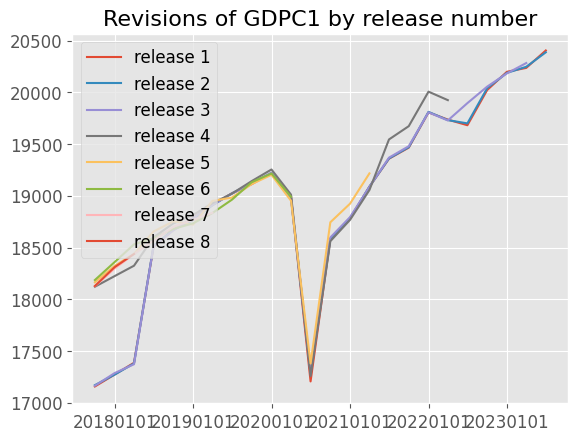

In [14]:
# revisions history by revision number
df = pd.concat([alf(series_id,
                    start=today - 60000,
                    freq=freq,
                    release=n).rename(f"release {n}")
                for n in range(1, 9)], axis=1)
#df.index = pd.DatetimeIndex(df.index.astype(str))
plot_date(df, title=f"Revisions of {series_id} by release number")
if imgdir:
    plt.savefig(imgdir / 'release_revisions.jpg')
show(df, caption=f"{series_id} Revisions, retrieved {today}")

In [15]:
show(alf.observations(series_id, date=today - 60000, freq='Q'))

,realtime_start,realtime_end,date,value
release,,,,
1,2017-10-27,2017-11-28,20170930,17156.946
2,2017-11-29,2017-12-20,20170930,17169.733
3,2017-12-21,2018-07-26,20170930,17163.894
4,2018-07-27,2019-07-25,20170930,18120.843
5,2019-07-26,2020-07-29,20170930,18163.558
6,2020-07-30,2021-07-28,20170930,18185.636
7,2021-07-29,2022-09-28,20170930,18126.226
8,2022-09-29,9999-12-31,20170930,18127.994


In [16]:
# Release dates of series in FRED-MD collection
md_df, md_transform = fred_md()
end = md_df.index[-1]
out = {}
for i, title in enumerate(md_df.columns):
    out[title] = alf(series_id=title,
                     release=1,
                     start=end-4, # within 4 days of monthend
                     end=end,
                     realtime=True)
    if title.startswith('S&P'):  # stock market data available same day close
        out[title] = Series({end: end}, name='realtime_start').to_frame()
    elif title in alf.splice_:
        if isinstance(Alfred.splice_[title], str):
            out[title] = alf(series_id=Alfred.splice_[title],
                             release=1,
                             start=end-4,  # within 4 days of monthend
                             end=end,
                             realtime=True)
        else:  # if FRED-MD series was spliced
            out[title] = pd.concat([alf(series_id=sub,
                                        reglease=1,
                                        start=end-4,  # within 4 days of monthend
                                        end=end,
                                        realtime=True)
                                    for sub in Alfred.splice_[title][1:]])

# special case of Consumer Sentiment (date convention)
df = alf('UMCSENT', release=1, realtime=True)
out['UMCSENT'] = df[df['realtime_start'] > end - 4].iloc[:1]

# special case of Claims (weekly averages)
df = alf('ICNSA', release=1, realtime=True)
out['CLAIMS'] = df[df['realtime_start'] > end - 4].iloc[:1]

monthly/current.csv


In [17]:
# Plot for a representative monthly cross-section
#release = Series({k: max(v['realtime_start'])
#                  for k,v in out.items() if v is not None and len(v)})\
#                      .sort_values()
release = Series({k: str(min(v['realtime_start'])) if v is not None and len(v)
                  else None
                  for k,v in out.items()}).sort_values()

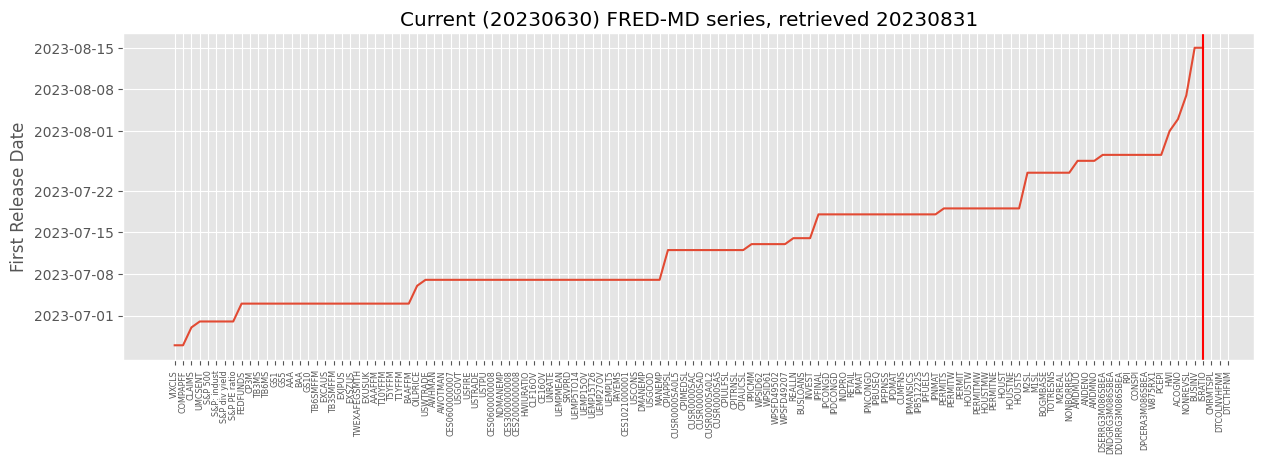

In [18]:
fig, ax = plt.subplots(clear=True, num=1, figsize=(13, 5))
ax.plot(pd.to_datetime(release, errors='coerce'))
ax.axvline(release[~release.isnull()].index[-1], c='r')
ax.set_title(f"Current ({end}) FRED-MD series, retrieved {today}")
ax.set_ylabel('First Release Date')
ax.set_xticks(np.arange(len(release)))
ax.set_xticklabels(release.index, rotation=90, fontsize='xx-small')
plt.tight_layout(pad=2)
if imgdir:
    plt.savefig(imgdir / 'fredmd_release.jpg')

In [19]:
md_missing = md_df.iloc[-1]
md_missing = md_missing[md_missing.isnull()]
print("Recent values available to update missing in current FRED-MD")
for series_id in md_missing.index:
    show(alf.splice(series_id).iloc[-3:])

Recent values available to update missing in current FRED-MD


In [20]:
Series(release.values,
       index=[(s, alf.header(s))
              for s in release.index]).tail(len(md_missing))

(CONSPI, Nonrevolving consumer credit to Personal Income)                                        20230728
(DPCERA3M086SBEA, Real personal consumption expenditures (chain-type quantity index))            20230728
(W875RX1, Real personal income excluding current transfer receipts)                              20230728
(PCEPI, Personal Consumption Expenditures: Chain-type Price Index)                               20230728
(HWI, Help Wanted Index for United States)                                                       20230801
(ACOGNO, Manufacturers' New Orders: Consumer Goods)                                              20230803
(NONREVSL, Nonrevolving Consumer Credit Owned and Securitized)                                   20230807
(BUSINV, Total Business Inventories)                                                             20230815
(ISRATIO, Total Business: Inventories to Sales Ratio)                                            20230815
(CMRMTSPL, Real Manufacturing and Trade Indust